In [19]:
# library(dplyr)
# library(reshape2)
# library(ggplot2)
# library(readr)
# library(lubridate)
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Read in the training data
data = pd.read_csv("all/train.csv")

# Build a contingency table of all combinations of crime categories and days of the week
crimes_by_day = data[['Category','DayOfWeek']]
#crimes_by_day=crimes_by_day.sort_values(by='', ascending=False)

In [21]:
data[['Date', 'Time']]=pd.DataFrame(data.Dates.str.split(' ',).tolist(), columns=['Date', 'Time'])
data['Date'].max(),  data['Date'].min()
data[['annee', 'irene', 'jour']]=pd.DataFrame(data.Dates.str.split('-',).tolist(), columns=['annee', 'irene', 'jour'])
data[['annee', 'Category']]

,annee,Category
0,2015,WARRANTS
1,2015,OTHER OFFENSES
2,2015,OTHER OFFENSES
3,2015,LARCENY/THEFT
4,2015,LARCENY/THEFT
5,2015,LARCENY/THEFT
6,2015,VEHICLE THEFT
7,2015,VEHICLE THEFT
8,2015,LARCENY/THEFT
9,2015,LARCENY/THEFT


LARCENY-THEFT


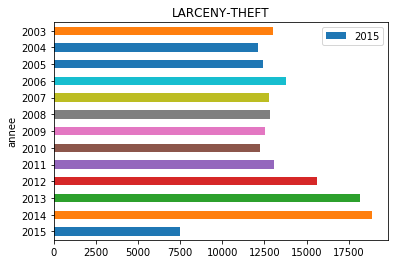

OTHER OFFENSES


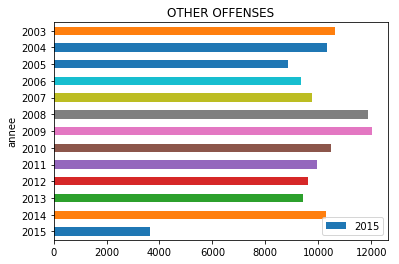

NON-CRIMINAL


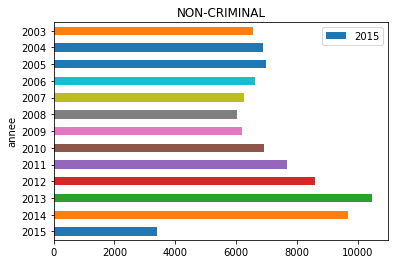

VEHICLE THEFT


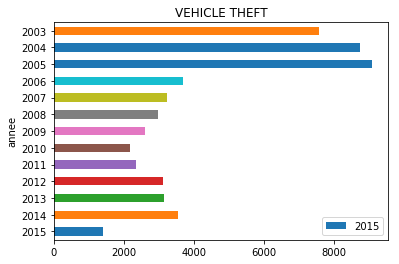

ASSAULT


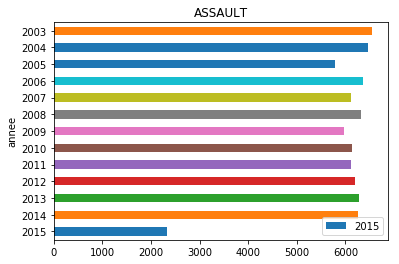

DRUG-NARCOTIC


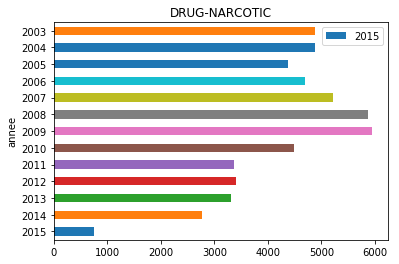

WARRANTS


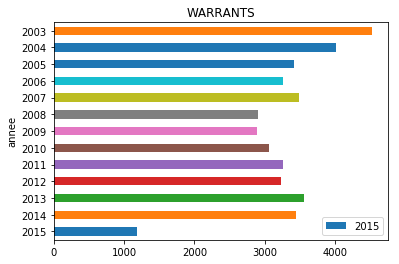

VANDALISM


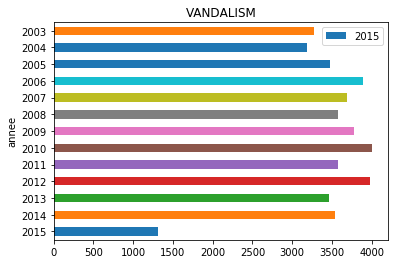

BURGLARY


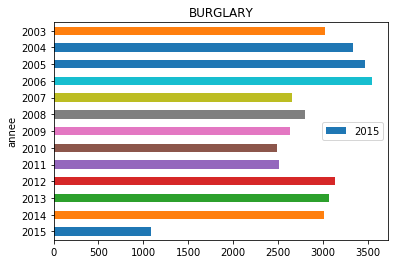

SUSPICIOUS OCC


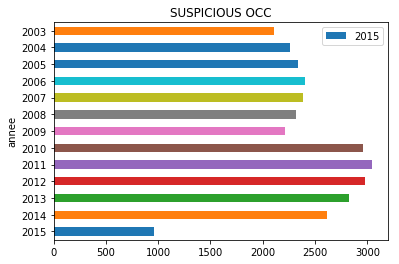

MISSING PERSON


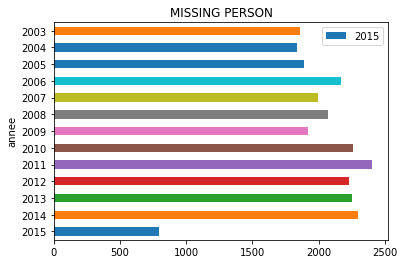

ROBBERY


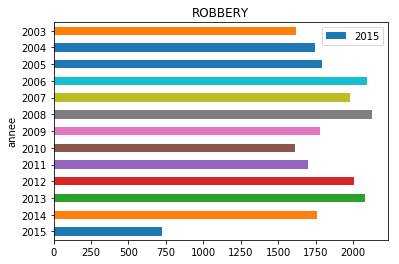

FRAUD


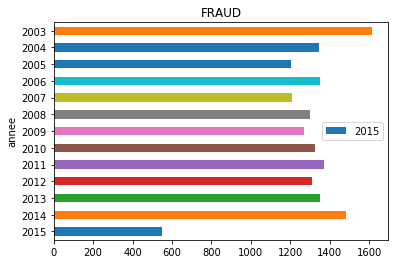

FORGERY-COUNTERFEITING


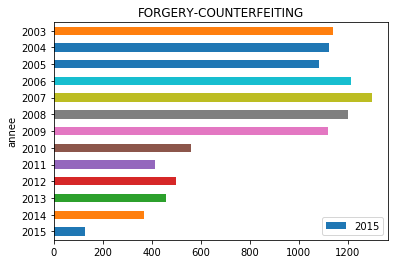

SECONDARY CODES


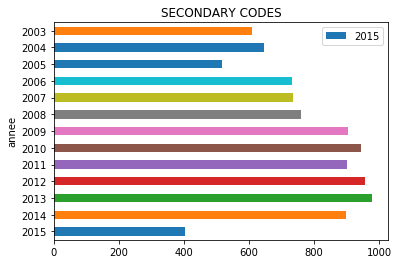

PROSTITUTION


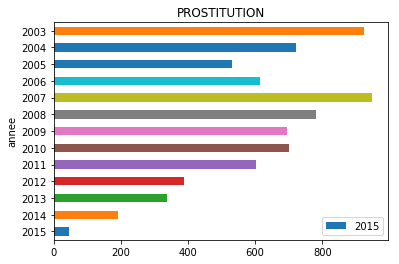

WEAPON LAWS


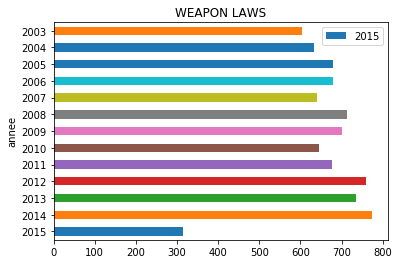

TRESPASS


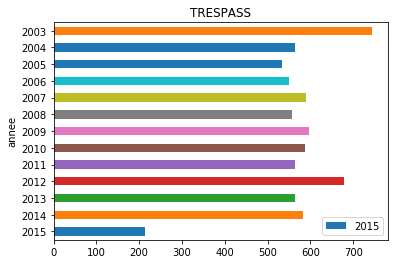

STOLEN PROPERTY


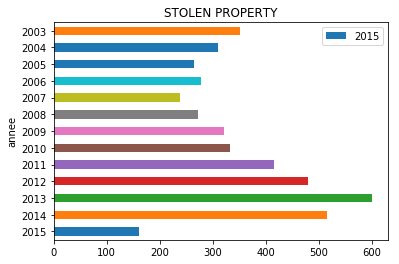

RECOVERED VEHICLE


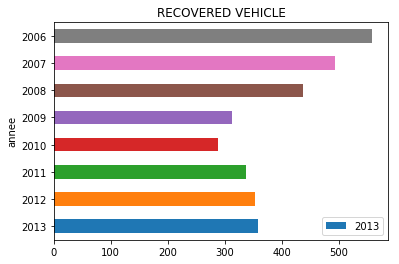

DISORDERLY CONDUCT


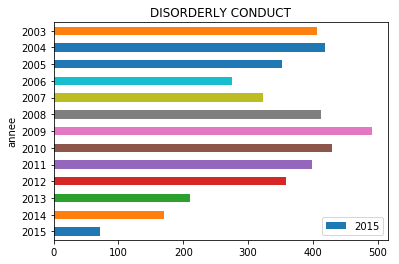

DRUNKENNESS


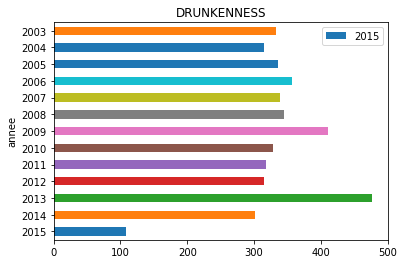

SEX OFFENSES FORCIBLE


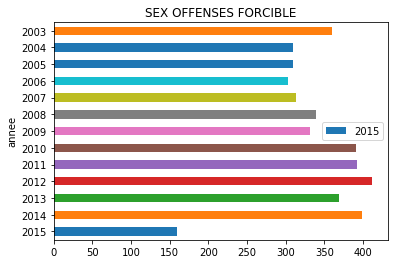

DRIVING UNDER THE INFLUENCE


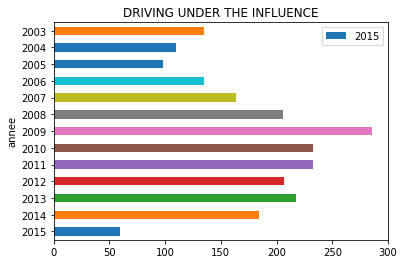

KIDNAPPING


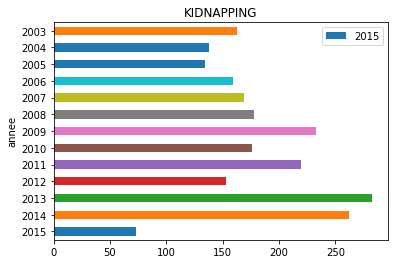

LIQUOR LAWS


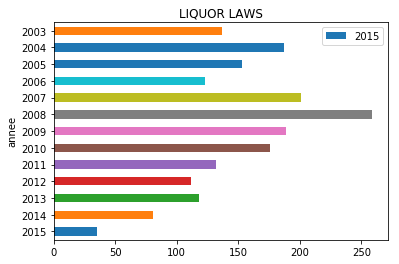

LOITERING


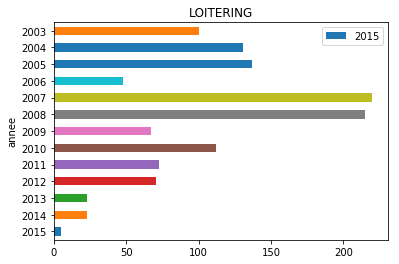

RUNAWAY


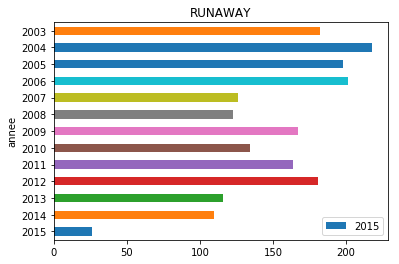

ARSON


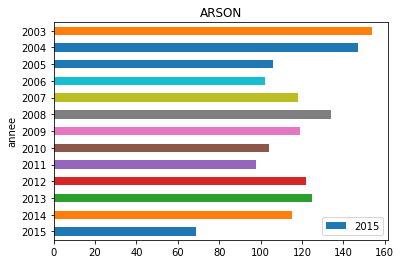

EMBEZZLEMENT


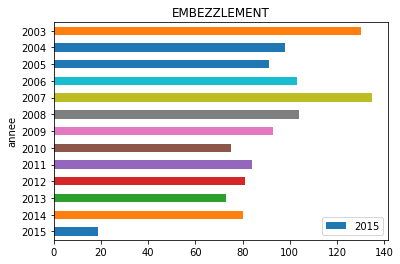

BAD CHECKS


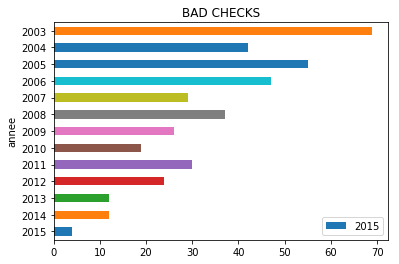

FAMILY OFFENSES


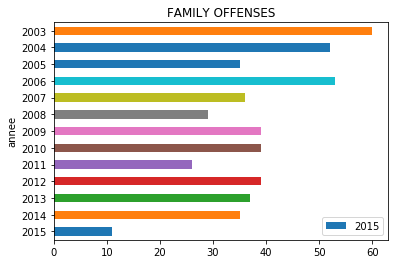

SUICIDE


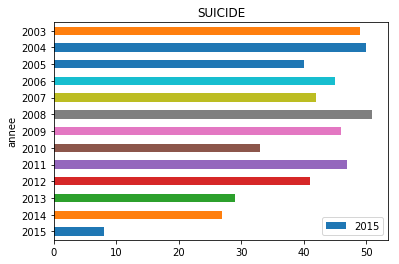

EXTORTION


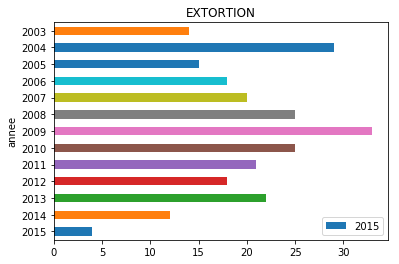

BRIBERY


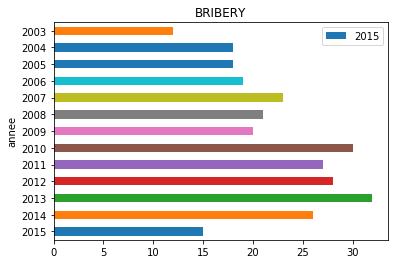

SEX OFFENSES NON FORCIBLE


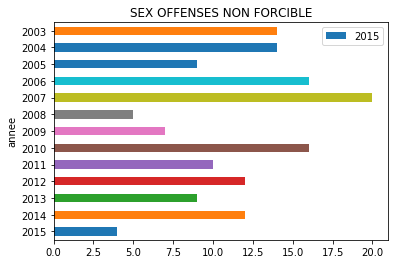

GAMBLING


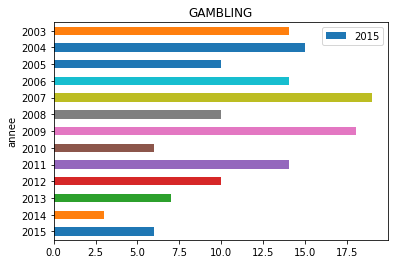

PORNOGRAPHY-OBSCENE MAT


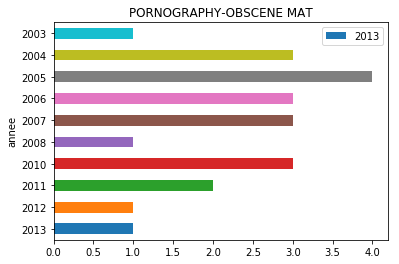

TREA


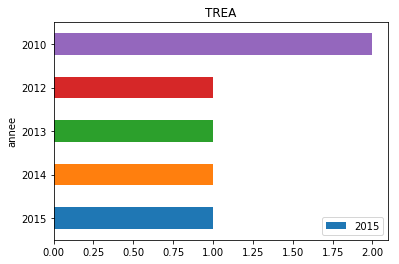

In [24]:





dataa=data.groupby(['annee','Category']).size().reset_index(name="Count")

dataa=dataa.sort_values(by='Count', ascending=False)
dataa.Category=dataa.Category.replace('LARCENY/THEFT', 'LARCENY-THEFT')
dataa.Category=dataa.Category.replace('FORGERY/COUNTERFEITING', 'FORGERY-COUNTERFEITING')
dataa.Category=dataa.Category.replace('PORNOGRAPHY/OBSCENE MAT', 'PORNOGRAPHY-OBSCENE MAT')
dataa.Category=dataa.Category.replace('DRUG/NARCOTIC', 'DRUG-NARCOTIC')

coll=dataa.Category
coll=list(coll.unique())
crimes_by_day_B=dataa.sort_values(by='annee', ascending=False)
for i in coll:
    week=crimes_by_day_B[crimes_by_day_B['Category']=='%s'%i]
#     week['Count']/=week['Count'].sum()
#     week['Count']*=100
    week.plot(kind='barh', x='annee', y='Count')#,ax=axs)
    plt.title('%s'%i)
    plt.legend(['%s']%week['annee'])
    print(i)
    plt.savefig('category_year/%s.png'%i, bbox_inches='tight')
    
    plt.show()
   

In [25]:
crimes_by_day_A[crimes_by_day_A['DayOfWeek']=='Wednesday']

NameError: name 'crimes_by_day_A' is not defined

In [26]:
col=crimes_by_day.DayOfWeek
col=list(col.unique())
col.index('Wednesday')


0

<Figure size 1080x720 with 0 Axes>

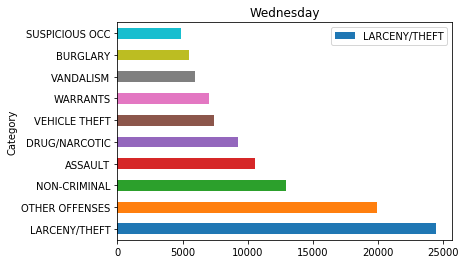

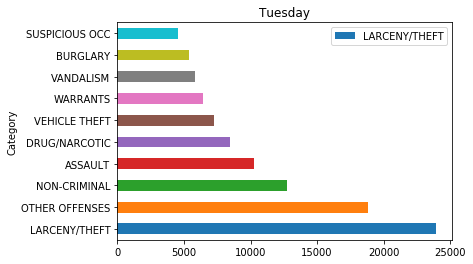

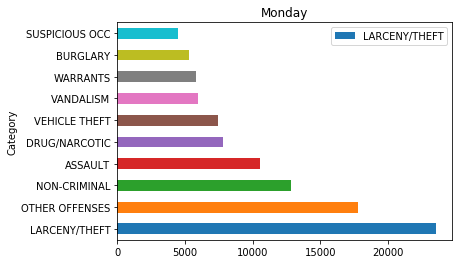

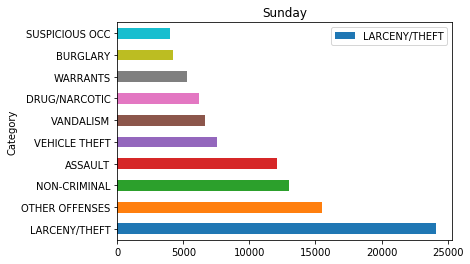

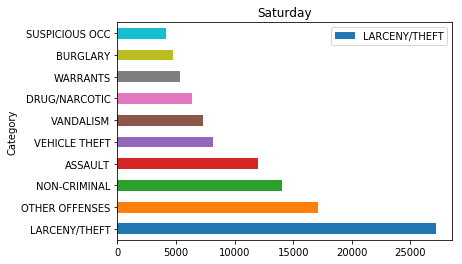

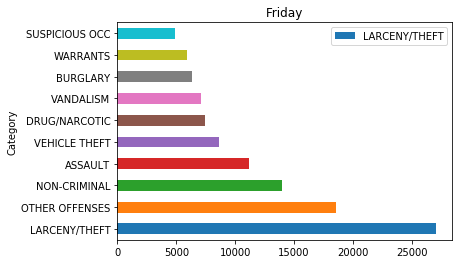

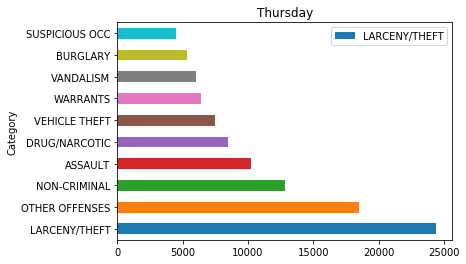

In [27]:
# Reshape the table, so I can plot it later
from collections import Counter
plt.figure(figsize=(15, 10))#, facecolor='w', edgecolor='k')
# fig.subplots_adjust(hspace = .5, wspace=.001)
#fig, axes = plt.subplots(nrows=1, ncols=7)

crimes_by_day_A=crimes_by_day.groupby(['Category','DayOfWeek']).size().reset_index(name="Count")
 
crimes_by_day_A=crimes_by_day_A.sort_values(by=['DayOfWeek','Count'], ascending=False)
for i in col:
    week=crimes_by_day_A[crimes_by_day_A['DayOfWeek']=='%s'%i][0:10]
    week.plot(kind='barh', x='Category', y='Count')#,ax=axs)
    plt.title('%s'%i)
    plt.legend(['%s']%week['Category'])
    plt.savefig('day_week/%s.png'%i, bbox_inches='tight')
    plt.show()
   


In [4]:
#link to put text on gif
#https://ezgif.com/add-text/ezgif-2-5fb90fab9eee.gif